In [1]:
import baostock as bs
import numpy as np
import pandas as pd

import datetime
# import tensorflow as tf
# from tensorflow import keras
import matplotlib. pyplot as plt 
from tqdm import tqdm

In [35]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Date: 2021/05/27 Thu
# @Author: ShayXU
# @Filename: 60日均线策略.py


"""
    运行时间: ~01:20, min
"""

import baostock as bs
import pandas as pd

import datetime
from tqdm import tqdm

# 参数
history_days = 15    # 历史股票天数
set_date = ""         # 设置日期

# 计算日期
if not set_date:
    now = datetime.datetime.now()
    if now.hour <= 17 and now.minute <= 30:
        now -= datetime.timedelta(days=1)
else:
    now = datetime.datetime.strptime(set_date, '%Y-%m-%d')


end_date = now.strftime('%Y-%m-%d')
start_date = (now - datetime.timedelta(days=history_days)).strftime('%Y-%m-%d')
print(start_date, end_date)

# 登陆系统
lg = bs.login()
if lg.error_code != '0':
    print("错误信息:", lg.error_code, lg.error_msg)

# 查询
data_list = []
stock_rs = bs.query_all_stock(end_date)     # 查询全量股票，含指数
stock_df  = stock_rs.get_data()
stock_df  =  stock_df [stock_df ['tradeStatus'] == '1'].reset_index(drop =  True)

data_df = pd.DataFrame()
islands_reversal = []       # 计算方差。
for row in tqdm(stock_df.itertuples()):
    code = row[1]
    code_name = row[3]
    k_rs = bs.query_history_k_data_plus(code, "high,low,date,close", start_date, end_date)
    data_df = k_rs.get_data()
    data_types_dict = {'high': float, 'low': float}
    data_df = data_df.astype(data_types_dict)

    # print(code, data_df.iloc[-2][0] - data_df.iloc[-3][1], data_df.iloc[-2][0] - data_df.iloc[-1][1])
    if len(data_df) >= 3 and data_df.iloc[-2][0] < data_df.iloc[-3][1] and data_df.iloc[-2][0] < data_df.iloc[-1][1]:
        date = data_df.iloc[-1][2]
        close = data_df.iloc[-1][3]
        islands_reversal.append([code, code_name, date, close])
        
bs.logout()
result = pd.DataFrame(islands_reversal, columns=['code', 'code_name', 'date', 'close'])
# result = result.reset_index(drop=True)
result.to_csv("岛型反转策略.csv", index=False)

00000014 0.3100000000000005
1402it [01:05, 34.84it/s] 1.889999999999997 0.1700000000000017
sh.603306 2.379999999999999 0.4399999999999977
sh.603308 0.6699999999999982 0.6799999999999997
sh.603309 0.10000000000000142 0.3000000000000007
sh.603311 0.21000000000000085 0.19000000000000128
sh.603313 0.4299999999999997 0.22999999999999687
sh.603315 0.25 0.10999999999999943
sh.603316 0.8799999999999999 0.3600000000000003
sh.603317 1.3699999999999974 2.0600000000000023
sh.603318 0.6899999999999995 0.46999999999999975
1411it [01:06, 24.50it/s]sh.603319 1.3800000000000026 0.990000000000002
sh.603320 0.23000000000000043 0.1999999999999993
sh.603321 0.14000000000000057 0.17000000000000082
sh.603322 0.48999999999999844 0.33999999999999986
sh.603323 0.040000000000000036 0.05999999999999961
sh.603324 3.299999999999997 2.3999999999999986
sh.603326 0.129999999999999 0.28999999999999915
1419it [01:06, 27.54it/s]sh.603327 0.4800000000000004 0.25
sh.603328 0.20999999999999996 0.08999999999999986
sh.603329 

IndexError: single positional indexer is out-of-bounds

In [30]:
data_types_dict = {'high': float, 'low': float,}
data_df = data_df.astype(data_types_dict)

In [39]:
islands_reversal

[]

In [125]:
"""运行时间: ~4 min"""

# 登陆系统
lg = bs.login()
if lg.error_code != '0':
    print("错误信息:", lg.error_code, lg.error_msg)

# 查询
data_list = []
stock_rs = bs.query_all_stock(end_date)     # 查询全量股票，含指数
stock_df  = stock_rs.get_data()
stock_df  =  stock_df [stock_df ['tradeStatus'] == '1'].reset_index(drop =  True)

data_df = pd.DataFrame()
variance = []       # 计算方差。
for row in tqdm(stock_df.itertuples()):
    # code, tradeStatus, code_name
    code = row[1]
    code_name = row[3]

    # 检测是否收盘超过3个点
    k_rs = bs.query_history_k_data_plus(code, "close,pctChg", end_date, end_date)
    
    pct_chg = float(k_rs.get_row_data()[1])    # percentage change
    if  pct_chg >= 3:
        # print(code, pct_chg)
        k_rs = bs.query_history_k_data_plus(code, "close", start_date, end_date)
        data_df = k_rs.get_data()
        var_tmp = data_df['close'].rolling(60).mean().dropna().var()
        variance.append([code, code_name, pct_chg, var_tmp])
        
bs.logout()
result = pd.DataFrame(variance, columns=['code', 'code_name', 'pct_chg', 'var'])
result = result.dropna().sort_values(by=['var']).reset_index(drop=True)
result.to_csv("60日均线策略.csv", index=False)

login success!
错误信息: 0 success
255it [00:10, 23.60it/s]logout success!



In [197]:
var_tmp = data_df['close'].rolling(30).mean().dropna()

In [2]:
bs.login()
code = 'sz.002069'
k_rs = bs.query_history_k_data_plus(code, "date, close", start_date, end_date)
data_df = k_rs.get_data()
var_tmp = data_df['close'].rolling(60).mean().dropna().var()
var_tmp

login success!


NameError: name 'start_date' is not defined

In [3]:
bs.login()
stock_rs = bs.query_all_stock('2021-05-28')
stock_df  = stock_rs.get_data()
stock_df

login success!


,code,tradeStatus,code_name
0,sh.000001,1,上证综合指数
1,sh.000002,1,上证A股指数
2,sh.000003,1,上证B股指数
3,sh.000004,1,上证工业类指数
4,sh.000005,1,上证商业类指数
...,...,...,...
4830,sz.399994,1,中证信息安全主题指数
4831,sz.399995,1,中证基建工程指数
4832,sz.399996,1,中证智能家居指数
4833,sz.399997,1,中证白酒指数


In [8]:
stock_df.shape, len(stock_df)

((4835, 3), 4835)

""


In [11]:
# 下载数据
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+ lg.error_code)
print('login respond  error_msg:'+ lg.error_msg)



rs = bs.query_history_k_data_plus(stock_code, "date,close,tradeStatus,pctChg", start_date=start_date, end_date=end_date, frequency="d", adjustflag="3")
print('query_history_k_data respond error_code:'+rs.error_code)
print('query_history_k_data respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():  # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
result.to_csv(stock_code + ".csv", encoding="gbk", index=False)

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data respond error_code:0
query_history_k_data respond  error_msg:success


In [5]:
stock = result
stock['avg_60d'] = stock['close'].rolling(60).mean()      

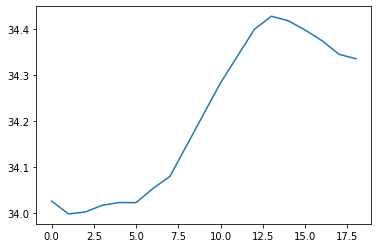

In [10]:
plt.plot(stock[pd.notna(stock['avg_60d'])]['avg_60d'].reset_index(drop=True))

In [9]:
stock[pd.notna(stock['avg_60d'])]['avg_60d'].reset_index(drop=True)

0     34.025833
1     33.997833
2     34.002000
3     34.016667
4     34.022500
5     34.022333
6     34.053167
7     34.079333
8     34.147167
9     34.215333
10    34.282833
11    34.341000
12    34.399000
13    34.427333
14    34.417500
15    34.397333
16    34.374167
17    34.344667
18    34.335000
Name: avg_60d, dtype: float64

In [10]:
result.dtypes

date           object
code           object
open           object
high           object
low            object
close          object
preclose       object
volume         object
amount         object
adjustflag     object
turn           object
tradestatus    object
pctChg         object
peTTM          object
pbMRQ          object
psTTM          object
pcfNcfTTM      object
isST           object
dtype: object

In [7]:
result[0:5]

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM,isST
0,2017-11-15,sz.300721,20.0500,24.0600,20.0500,24.0600,16.7100,8575,205713.5000,3,0.042768,1,43.985640,30.657271,3.573392,1.658425,-15.129562,0
1,2017-11-16,sz.300721,26.4700,26.4700,26.4700,26.4700,24.0600,2640,69880.8000,3,0.013167,1,10.016620,33.728095,3.931326,1.824543,-16.645034,0
2,2017-11-17,sz.300721,29.1200,29.1200,29.1200,29.1200,26.4700,3200,93184.0000,3,0.015960,1,10.011340,37.104728,4.324904,2.007204,-18.311424,0
3,2017-11-20,sz.300721,32.0300,32.0300,32.0300,32.0300,29.1200,6625,212198.7500,3,0.033042,1,9.993125,40.812652,4.757097,2.207786,-20.141308,0
4,2017-11-21,sz.300721,35.2300,35.2300,35.2300,35.2300,32.0300,22158,780626.3400,3,0.110514,1,9.990636,44.890095,5.232361,2.428358,-22.153553,0


In [6]:
i = 0
result[['date', 'close']][i:i+5]

,date,close
0,2017-11-15,24.0600
1,2017-11-16,26.4700
2,2017-11-17,29.1200
3,2017-11-20,32.0300
4,2017-11-21,35.2300


In [5]:
# 读取csv文件
stock = pd.read_csv(stock_code + ".csv")

In [6]:
stock.dtypes

date            object
code            object
open           float64
high           float64
low            float64
close          float64
preclose       float64
volume           int64
amount         float64
adjustflag       int64
turn           float64
tradestatus      int64
pctChg         float64
peTTM          float64
pbMRQ          float64
psTTM          float64
pcfNcfTTM      float64
isST             int64
dtype: object

In [7]:
stock['variation'] = (stock['close'] - stock['close'].shift(1))/stock['close'].shift(1) * 100
stock['variation'] 

0            NaN
1      10.016625
2      10.011334
3       9.993132
4       9.990634
         ...    
800    -0.377054
801    -1.865369
802    -0.055096
803    -1.626240
804    -6.976744
Name: variation, Length: 805, dtype: float64

In [83]:
for i in range(-20, 21, 2):
    print(i, end=', ')


-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 

In [89]:
# https://blog.csdn.net/qq_41892229/article/details/109702038
stock_bins = [-10, -5, -3, 3, 5, 10]
stock_GEM_bins = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]   # 创业板
labels = stock_GEM_bins.copy()
labels.remove(0)
a, b = pd.cut(x=stock['variation'], bins=stock_GEM_bins, retbins=True, right=True, labels= labels)

In [90]:
a.value_counts(sort=False)

-20      0
-18      0
-16      0
-14      0
-12      7
-10     10
-8      23
-6      37
-4     122
-2     189
 2     219
 4     110
 6      45
 8       9
 10     15
 12     17
 14      1
 16      0
 18      0
 20      0
Name: variation, dtype: int64

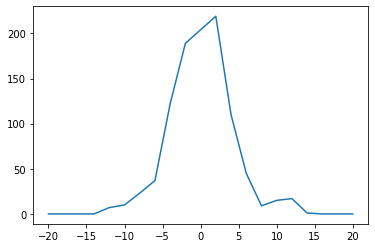

In [91]:
plt.plot(a.value_counts(sort=False).index, a.value_counts(sort=False).values)

[]